In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 현대 디렉토리 확인
current_dir = os.getcwd()
current_dir

'/Users/limjongjun/Desktop/JayJay/Growth/Python/soccer-analytics/Excercise'

In [3]:
# Data가 있는 디렉토리로 변경
new_dir = '/Users/limjongjun/Desktop/JayJay/Growth/Python/soccer-analytics'
os.chdir(new_dir)
print(current_dir)

/Users/limjongjun/Desktop/JayJay/Growth/Python/soccer-analytics/Excercise


In [4]:
# Manshester City VS Tottenham Hotspur 경기 불러오기
match_id = 2499895
match_events = pd.read_pickle(f'data/refined_events/England/2499895.pkl') #pkl 파일을 Dataframe으로 불러오기

In [5]:
# 데이터 확인
match_events.head()

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,2499895,215108367,1H,1.784,1625,Manchester City,8325,S. Agüero,Pass,Simple pass,[Accurate],52.00,34.68,40.56,34.68
1,2499895,215108368,1H,3.324,1625,Manchester City,105339,Fernandinho,Pass,Simple pass,[Accurate],40.56,34.68,29.12,8.16
2,2499895,215108369,1H,6.406,1625,Manchester City,8277,K. Walker,Pass,Simple pass,[Accurate],29.12,8.16,44.72,10.20
3,2499895,215108370,1H,7.124,1625,Manchester City,38021,K. De Bruyne,Pass,Simple pass,[Accurate],44.72,10.20,69.68,6.12
4,2499895,215108371,1H,8.676,1625,Manchester City,11066,R. Sterling,Pass,Simple pass,[Accurate],69.68,6.12,58.24,12.24


## 경기 이벤트 시간 구간별 집계 및 시각화

### (1) pandas.cut 함수를 활용한 연속형 데이터 분할

- 5분 단위 분할 집계를 위한 기준점 리스트 생성

In [6]:
bins = np.arange(0,50,5)
bins = np.append(bins,[100])
bins

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45, 100])

- 기준점을 이용한 시간 구간 분할

In [7]:
match_events['time_cat'] = pd.cut(match_events['time'] / 60 , bins, right = False)

In [8]:
match_events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y,time_cat
0,2499895,215108367,1H,1.784,1625,Manchester City,8325,S. Agüero,Pass,Simple pass,[Accurate],52.00,34.68,40.56,34.68,"[0, 5)"
1,2499895,215108368,1H,3.324,1625,Manchester City,105339,Fernandinho,Pass,Simple pass,[Accurate],40.56,34.68,29.12,8.16,"[0, 5)"
2,2499895,215108369,1H,6.406,1625,Manchester City,8277,K. Walker,Pass,Simple pass,[Accurate],29.12,8.16,44.72,10.20,"[0, 5)"
3,2499895,215108370,1H,7.124,1625,Manchester City,38021,K. De Bruyne,Pass,Simple pass,[Accurate],44.72,10.20,69.68,6.12,"[0, 5)"
4,2499895,215108371,1H,8.676,1625,Manchester City,11066,R. Sterling,Pass,Simple pass,[Accurate],69.68,6.12,58.24,12.24,"[0, 5)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,2499895,215110122,2H,2875.703,1624,Tottenham Hotspur,210044,E. Dier,Pass,Simple pass,[Accurate],36.40,26.52,48.88,29.92,"[45, 100)"
1608,2499895,215110123,2H,2876.142,1624,Tottenham Hotspur,240070,H. Winks,Duel,Ground attacking duel,"[Anticipation, Lost, Not accurate]",48.88,29.92,43.68,24.48,"[45, 100)"
1609,2499895,215109959,2H,2876.768,1625,Manchester City,447205,P. Foden,Duel,Ground defending duel,"[Anticipated, Won, Accurate]",55.12,38.08,60.32,43.52,"[45, 100)"
1610,2499895,215109960,2H,2878.046,1625,Manchester City,11066,R. Sterling,Duel,Ground attacking duel,"[Free space right, Lost, Not accurate]",60.32,43.52,60.32,43.52,"[45, 100)"


### (2) 시간 구간별 이벤트 횟수 집계

- 5분 단위 팀당 이벤트 횟수 집계

In [9]:
# 주어진 데이터프레임(match_events)에서 'event_id' 열을 사용하여 피벗 테이블을 생성합니다.
# 각 피벗 테이블 셀은 'event_id' 값들에 대한 통계 정보를 담게 됩니다.
# 인덱스로는 'period' 및 'time_cat' 열의 고유한 조합을 사용하며,
# 각 팀('team_name')은 피벗 테이블의 열로 사용됩니다.
# 'count' 함수는 'event_id' 값들의 개수를 세기 위해 사용됩니다.
match_events.pivot_table(values='event_id',  # 'event_id' 열의 값을 사용
                         index=['period', 'time_cat'],  # 'period' 및 'time_cat' 열을 인덱스로 사용
                         columns='team_name',  # 'team_name' 열을 피벗 테이블의 열로 사용
                         aggfunc='count')  # 'count' 함수를 사용하여 값들을 집계

# match_events.pivot_table('event_id',  ['period','time_cat'] , 'team_name', 'count')


team_name         Manchester City  Tottenham Hotspur
period time_cat                                     
1H     [0, 5)                  56                 56
       [5, 10)                 62                 48
       [10, 15)                51                 38
       [15, 20)                43                 53
       [20, 25)                28                 55
       [25, 30)                52                 33
       [30, 35)                28                 42
       [35, 40)                20                 35
       [40, 45)                60                 35
       [45, 100)               22                 20
2H     [0, 5)                  48                 57
       [5, 10)                 29                 59
       [10, 15)                37                 37
       [15, 20)                43                 46
       [20, 25)                40                 30
       [25, 30)                39                 46
       [30, 35)                41                 47
       [35, 40)                14                 35
       [40, 45)                56                 27
       [45, 100)               23                 21

- 시간 구간 레이블 생성

In [10]:
labels = []
for i in range(len(bins)-2):
    label = f'{bins[i]:02d}-{bins[i+1]:02d}'
    labels.append(label)
labels.append('45+')
labels

['00-05',
 '05-10',
 '10-15',
 '15-20',
 '20-25',
 '25-30',
 '30-35',
 '35-40',
 '40-45',
 '45+']

- 시간 구간 레이블을 추가한 5분 단위 팀당 이벤트 횟수 집계

In [11]:
match_events['time_cat'] = pd.cut(match_events['time'] / 60 , bins = bins , labels=labels, right = False)
count_by_time = match_events.pivot_table( 'event_id',  ['period','time_cat'] , 'team_name', 'count', fill_value=0)
count_by_time

team_name        Manchester City  Tottenham Hotspur
period time_cat                                    
1H     00-05                  56                 56
       05-10                  62                 48
       10-15                  51                 38
       15-20                  43                 53
       20-25                  28                 55
       25-30                  52                 33
       30-35                  28                 42
       35-40                  20                 35
       40-45                  60                 35
       45+                    22                 20
2H     00-05                  48                 57
       05-10                  29                 59
       10-15                  37                 37
       15-20                  43                 46
       20-25                  40                 30
       25-30                  39                 46
       30-35                  41                 47
       35-40                  14                 35
       40-45                  56                 27
       45+                    23                 21

### (3) 전반전 이벤트 횟수 5분 단위 시각화

- 전반전 시간 구간별 전체 이벤트 횟수 집계

In [12]:
half_count_by_time = count_by_time.loc['1H', 'Manchester City']
half_count_by_time

time_cat
00-05    56
05-10    62
10-15    51
15-20    43
20-25    28
25-30    52
30-35    28
35-40    20
40-45    60
45+      22
Name: Manchester City, dtype: int64

- plt.bar 함수를 활용한 막대그래프 시각화

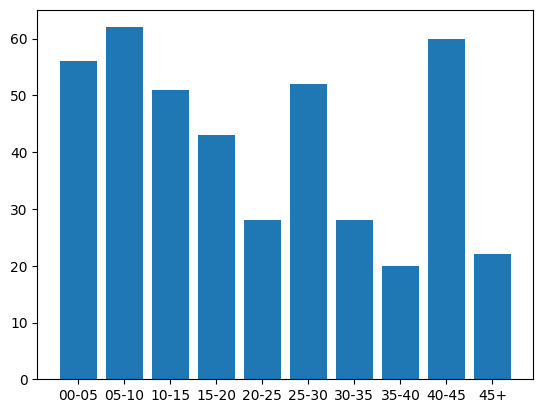

In [13]:
plt.bar(half_count_by_time.index, half_count_by_time.values)
plt.show()

### (4) 경기 전체 이벤트 횟수 5분 단위 시각화

- 5분 단위 팀당 이벤트 횟수

In [14]:
count_by_time

team_name        Manchester City  Tottenham Hotspur
period time_cat                                    
1H     00-05                  56                 56
       05-10                  62                 48
       10-15                  51                 38
       15-20                  43                 53
       20-25                  28                 55
       25-30                  52                 33
       30-35                  28                 42
       35-40                  20                 35
       40-45                  60                 35
       45+                    22                 20
2H     00-05                  48                 57
       05-10                  29                 59
       10-15                  37                 37
       15-20                  43                 46
       20-25                  40                 30
       25-30                  39                 46
       30-35                  41                 47
       35-40                  14                 35
       40-45                  56                 27
       45+                    23                 21

- 다중 인덱스를 단일 인덱스로 변환

In [15]:
idx_1h = []
idx_2h = []

for multi_idx in count_by_time.index:
    if multi_idx[0] == '1H':
        idx = multi_idx[1]
        idx_1h.append(idx)
    else:
        if '-' in multi_idx[1]:
            edges = multi_idx[1].split('-')
            start_min = int(edges[0]) + 45
            end_min = int(edges[1]) + 45
            idx = f'{start_min:02d}-{end_min:02d}'
        else:
            idx = '90+'
        idx_2h.append(idx)

idx_1h, idx_2h

(['00-05',
  '05-10',
  '10-15',
  '15-20',
  '20-25',
  '25-30',
  '30-35',
  '35-40',
  '40-45',
  '45+'],
 ['45-50',
  '50-55',
  '55-60',
  '60-65',
  '65-70',
  '70-75',
  '75-80',
  '80-85',
  '85-90',
  '90+'])

- plt.barh 함수를 활용한 수평 막대 그래프 시각화

In [16]:
count_by_time.index = idx_1h + idx_2h
count_by_time

team_name,Manchester City,Tottenham Hotspur
00-05,56,56
05-10,62,48
10-15,51,38
15-20,43,53
20-25,28,55
25-30,52,33
30-35,28,42
35-40,20,35
40-45,60,35
45+,22,20


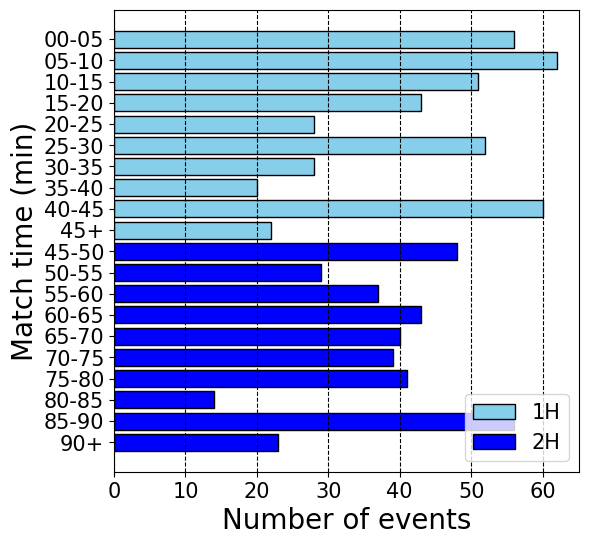

In [17]:
plt.figure(figsize=(6,6))

for half, half_idx, color in zip(['1H','2H'], [idx_1h, idx_2h], ['skyblue', 'blue']): #전반은 하늘색, 후반전은 파란색
    half_counts = count_by_time['Manchester City'].loc[half_idx]
    plt.barh(half_idx, half_counts, label = half, color = color, edgecolor = 'black') #수직 막대그래프 

plt.gca().invert_yaxis() #y축 반전
plt.grid(axis= 'x', color = 'k', linestyle = '--')
plt.legend(fontsize= 15)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.xlabel('Number of events', fontsize= 20)
plt.ylabel('Match time (min)', fontsize= 20)
plt.show()

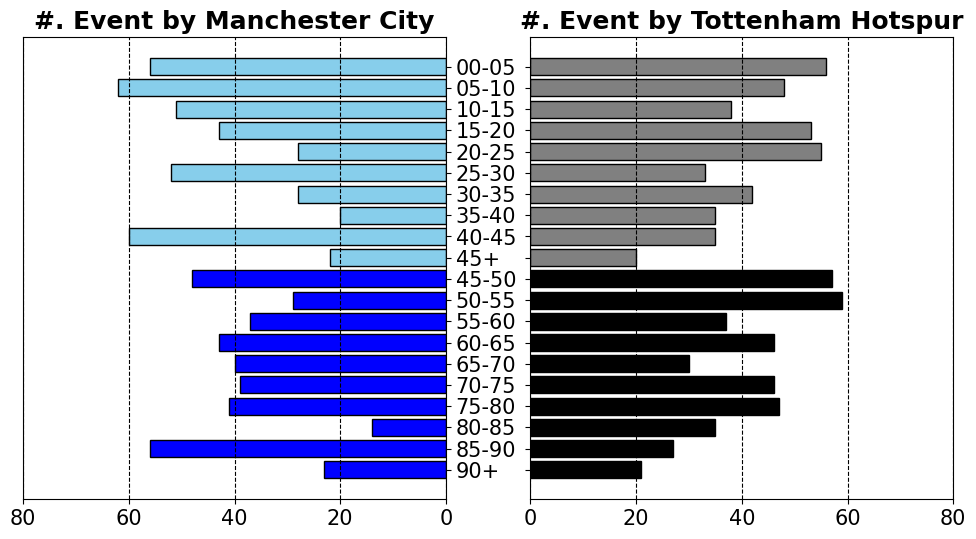

In [18]:
fig, axes = plt.subplots(ncols = 2, sharey = True, figsize = (12,6)) #sharey = True : y 축 공유
team1_name, team2_name = match_events['team_name'].unique()

for half, half_idx, color in zip(['1H','2H'], [idx_1h, idx_2h], ['skyblue', 'blue']): #전반은 하늘색, 후반전은 파란색
    half_counts = count_by_time[team1_name].loc[half_idx] # Manchester City
    axes[0].barh(half_idx, half_counts, label = half, color = color, edgecolor = 'k')

for half, half_idx, color in zip(['1H','2H'], [idx_1h, idx_2h], ['grey', 'black']): #전반은 회색, 후반전은 검정
    half_counts = count_by_time[team2_name].loc[half_idx] # Tottenham
    axes[1].barh(half_idx, half_counts, label = half, color = color, edgecolor = 'k')

plt.gca().invert_yaxis()

axes[0].invert_xaxis()
axes[0].yaxis.tick_right()

for team_name, ax in zip([team1_name, team2_name], axes):
    ax.grid(axis = 'x', color = 'k', linestyle = '--')
    ax.set_title(f'#. Event by {team_name}', size = 18, fontweight = 'bold')
    ax.set_xticks(np.arange(0,100,20))
    ax.tick_params(labelsize = 15)

plt.show()

## 대회 전체 이벤트 데이터 시간 구간별 집계 및 시각화

### (1) 대회 전체 이벤트 데이터를 하나의 DataFrame으로 연결하기

In [19]:
dataset_name = 'England'
match_df = pd.read_csv(f'data/refined_events/England/matches.csv', index_col=0, encoding='utf-8-sig')

match_events_list = []

for match_id in match_df.index :
    match_events = pd.read_pickle(f'data/refined_events/England/{match_id}.pkl')
    match_events_list.append(match_events)

events = pd.concat(match_events_list, ignore_index= True)
events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,2499719,177959171,1H,2.759,1609,Arsenal,25413,A. Lacazette,Pass,Simple pass,[Accurate],50.96,34.68,32.24,14.96
1,2499719,177959172,1H,4.947,1609,Arsenal,370224,R. Holding,Pass,High pass,[Accurate],32.24,14.96,53.04,17.00
2,2499719,177959173,1H,6.542,1609,Arsenal,3319,M. Özil,Pass,Head pass,[Accurate],53.04,17.00,36.40,19.72
3,2499719,177959174,1H,8.143,1609,Arsenal,120339,Mohamed Elneny,Pass,Head pass,[Accurate],36.40,19.72,42.64,3.40
4,2499719,177959175,1H,10.302,1609,Arsenal,167145,Bellerín,Pass,Simple pass,[Accurate],42.64,3.40,74.88,8.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647247,2500089,251701859,2H,3010.063,1659,AFC Bournemouth,11669,C. Wilson,Pass,Head pass,[Not accurate],63.44,47.60,65.52,31.96
647248,2500089,251701668,2H,3012.989,1646,Burnley,8433,S. Ward,Pass,High pass,[Not accurate],38.48,36.04,74.88,6.80
647249,2500089,251701860,2H,3014.732,1659,AFC Bournemouth,134102,N. Aké,Others on the ball,Clearance,"[Interception, Not accurate]",29.12,61.20,28.08,68.00
647250,2500089,251701861,2H,3018.672,1659,AFC Bournemouth,0,NaN,Interruption,Ball out of the field,[],28.08,68.00,NaN,NaN


In [20]:
bins = np.arange(0,50,5)
bins = np.append(bins,[100])

labels = []
for i in range(len(bins)-2):
    label = f'{bins[i]:02d}-{bins[i+1]:02d}'
    labels.append(label)
labels.append('45+')

events['time_cat'] = pd.cut(events['time'] / 60 , bins = bins , labels=labels, right = False)
count_by_time = events.groupby(['period', 'time_cat'])['event_id'].count()
count_by_time

period  time_cat
1H      00-05       37582
        05-10       35909
        10-15       35278
        15-20       34003
        20-25       33973
        25-30       33925
        30-35       33390
        35-40       33357
        40-45       33717
        45+         12610
2H      00-05       36706
        05-10       34224
        10-15       32706
        15-20       32440
        20-25       32347
        25-30       32077
        30-35       31971
        35-40       32499
        40-45       32063
        45+         26475
Name: event_id, dtype: int64

In [21]:
mean_count_by_time = count_by_time.loc[['1H','2H']] / len(match_df)

idx_1h = []
idx_2h = []

for multi_idx in mean_count_by_time.index:
    if multi_idx[0] == '1H':
        idx = multi_idx[1]
        idx_1h.append(idx)
    else:
        if '-' in multi_idx[1]:
            edges = multi_idx[1].split('-')
            start_min = int(edges[0]) + 45
            end_min = int(edges[1]) + 45
            idx = f'{start_min:02d}-{end_min:02d}'
        else:
            idx = '90+'
        idx_2h.append(idx)

mean_count_by_time.index = idx_1h + idx_2h
mean_count_by_time

00-05    98.900000
05-10    94.497368
10-15    92.836842
15-20    89.481579
20-25    89.402632
25-30    89.276316
30-35    87.868421
35-40    87.781579
40-45    88.728947
45+      33.184211
45-50    96.594737
50-55    90.063158
55-60    86.068421
60-65    85.368421
65-70    85.123684
70-75    84.413158
75-80    84.134211
80-85    85.523684
85-90    84.376316
90+      69.671053
Name: event_id, dtype: float64

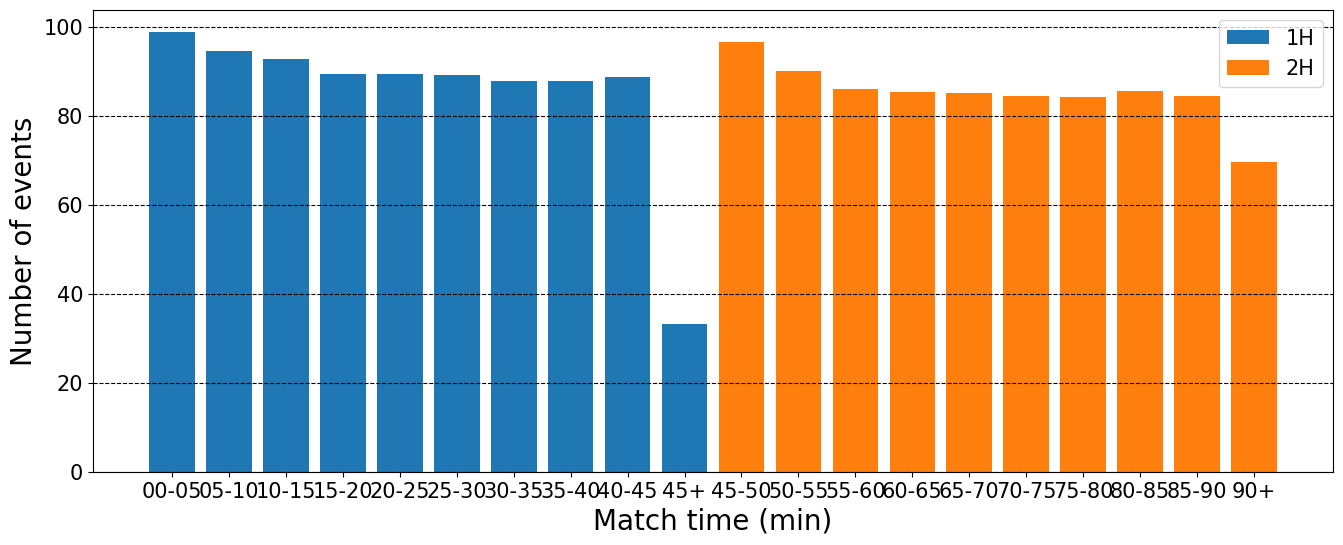

In [24]:
plt.figure(figsize=(16,6))

for half, half_idx, color in zip(['1H','2H'], [idx_1h, idx_2h], ['C0', 'C1']):
    half_counts = mean_count_by_time[half_idx]
    plt.bar(half_idx, half_counts, label = half, color = color) # 수평 막대 그래프

plt.grid(axis= 'y', color = 'k', linestyle = '--')
plt.legend(fontsize= 15)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.xlabel('Match time (min)', fontsize= 20)
plt.ylabel('Number of events', fontsize= 20)
plt.show()

### (3) 시간 구간별 득점 횟수 집계 및 시각화

- 득점 데이터 추출

In [25]:
goals = events[(events['tags'].apply(lambda x: 'Goal' in x or 'Own goal' in x))]
goals

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y,time_cat
46,2499719,177959212,1H,94.596,1609,Arsenal,25413,A. Lacazette,Shot,Shot,"[Goal, Right foot, Opportunity, Position: Goal...",91.52,40.12,104.0,34.0,00-05
91,2499719,177959280,1H,254.745,1631,Leicester City,14763,S. Okazaki,Shot,Shot,"[Goal, Head/body, Opportunity, Position: Goal ...",99.84,32.64,104.0,34.0,00-05
554,2499719,177959759,1H,1710.855,1631,Leicester City,12829,J. Vardy,Shot,Shot,"[Goal, Right foot, Opportunity, Position: Goal...",97.76,31.28,104.0,34.0,25-30
898,2499719,177960130,1H,2815.901,1609,Arsenal,7945,D. Welbeck,Shot,Shot,"[Goal, Right foot, Opportunity, Position: Goal...",95.68,34.00,104.0,34.0,45+
1107,2499719,177960379,2H,634.312,1631,Leicester City,12829,J. Vardy,Shot,Shot,"[Goal, Head/body, Opportunity, Position: Goal ...",95.68,31.28,104.0,34.0,10-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645400,2500098,251596263,2H,1737.065,1623,Everton,145692,O. Niasse,Shot,Shot,"[Goal, Right foot, Opportunity, Position: Goal...",100.88,30.60,104.0,34.0,25-30
645535,2500098,251596096,2H,2193.887,1633,West Ham United,41174,M. Lanzini,Shot,Shot,"[Goal, Right foot, Opportunity, Position: Goal...",89.44,45.56,104.0,34.0,35-40
646362,2500089,251700843,1H,2307.084,1646,Burnley,9206,C. Wood,Shot,Shot,"[Goal, Left foot, Interception, Opportunity, P...",95.68,34.68,104.0,34.0,35-40
646916,2500089,251701666,2H,1682.852,1659,AFC Bournemouth,9637,J. King,Shot,Shot,"[Goal, Right foot, Opportunity, Position: Goal...",95.68,46.92,104.0,34.0,25-30


In [26]:
goals_by_time = goals.groupby(['period', 'time_cat'])['event_id'].count()[['1H', '2H']]
goals_by_time.index = idx_1h + idx_2h
goals_by_time

00-05    37
05-10    40
10-15    42
15-20    50
20-25    48
25-30    49
30-35    41
35-40    47
40-45    47
45+      26
45-50    56
50-55    63
55-60    54
60-65    62
65-70    60
70-75    66
75-80    58
80-85    59
85-90    63
90+      49
Name: event_id, dtype: int64

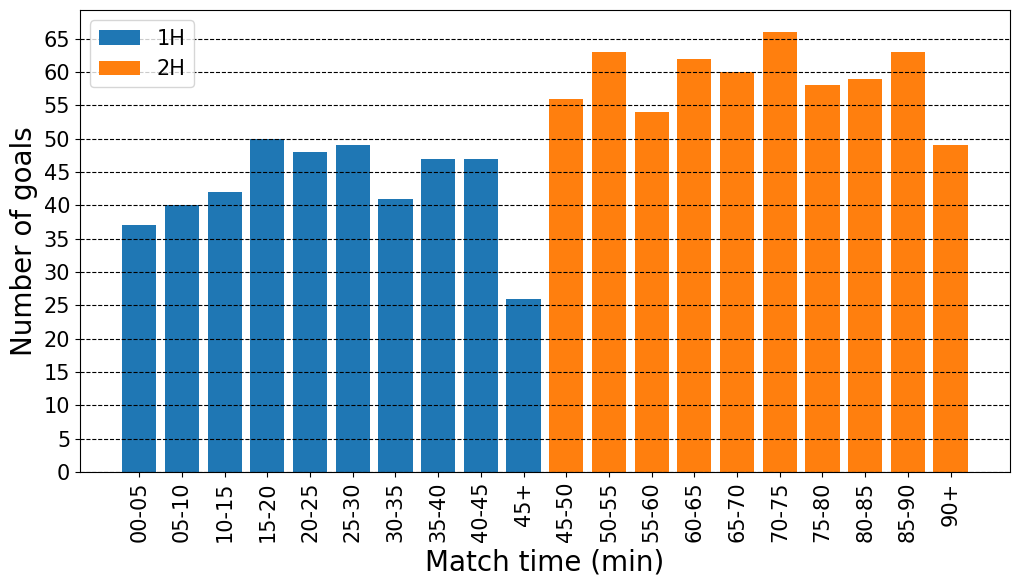

In [27]:
plt.figure(figsize=(12, 6))

for half, half_idx, color in zip(['1H', '2H'], [idx_1h, idx_2h], ['C0', 'C1']):
    half_counts = goals_by_time[half_idx]
    plt.bar(half_idx, half_counts, label=half, color=color)

plt.grid(axis='y', color='k', linestyle='--')
plt.legend(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(np.arange(0, 70, 5), fontsize=15)
plt.xlabel('Match time (min)', fontsize=20)
plt.ylabel('Number of goals', fontsize=20)
plt.show()